In [9]:
# ========== ----- ========== Import Libraries ========== ----- ========== #

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from joblib import dump, load

# from mlxtend.plotting import plot_decision_regions 

# ========== ----- ========== End ========== ----- ========== #

In [10]:
# ========== ----- ========== Import Dataset ========== ----- ========== #

# Read the CSV file into a pandas DataFrame
df = pd.read_csv('final_df.csv')

# get the number of rows and columns
num_rows, num_cols = df.shape

print('Number of Rows: ', num_rows)
print('Number of Columns: ', num_cols, "\n")

# Display the first few rows of the DataFrame
print(df.head())

# ========== ----- ========== End ========== ----- ========== #


Number of Rows:  135493
Number of Columns:  50 

   client_catg  avg_elec_reading_remarque  avg_elec_consommation_level_1  \
0           11                   6.971429                     352.400000   
1           11                   7.216216                     557.540541   
2           11                   7.055556                     798.611111   
3           11                   6.150000                       1.200000   
4           11                   8.857143                     663.714286   

   avg_elec_consommation_level_2  avg_elec_consommation_level_3  \
0                      10.571429                       0.000000   
1                       0.000000                       0.000000   
2                      37.888889                       0.000000   
3                       0.000000                       0.000000   
4                     104.857143                     117.357143   

   avg_elec_consommation_level_4  avg_elec_months_number  \
0                       0.00000

0    127927
1      7566
Name: target, dtype: int64


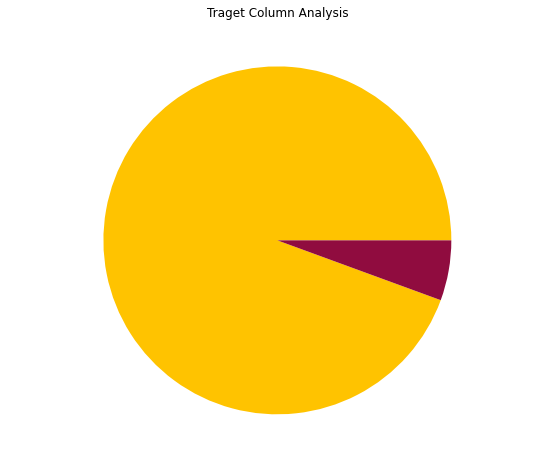

In [11]:
# ========== ----- ========== Traget Column Analysis ========== ----- ========== #

# get the values of Target and their counts
target_counts = df['target'].value_counts()
print(target_counts)

# Create a pie chart
custom_colors = ['#FFC300', '#900C3F']
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(target_counts, labels=["Unfraud", "Fraud"],
       colors=custom_colors, labeldistance=1.2, textprops={'color': 'white', 'fontsize': 16})
# Add a title
plt.title('Traget Column Analysis')
# Show the chart
plt.show()

# ========== ----- ========== End ========== ----- ========== #


{0: 102392, 1: 102392}


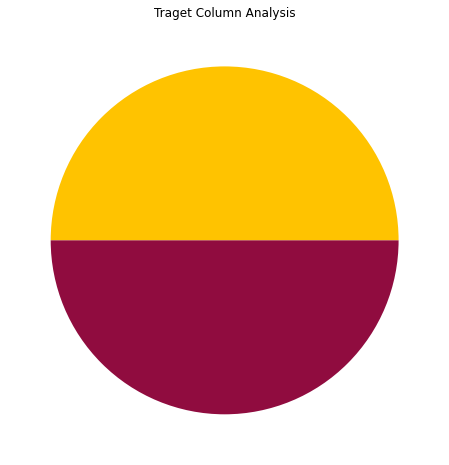

In [12]:
# ========== ----- ========== Imbalanced Dataset ========== ----- ========== #

"""
Imbalanced datasets can pose a challenge for machine learning models because they tend to be biased towards the majority class, resulting in poor performance on the minority class. Therefore, it is important to address class imbalance before training a model.
Here are some common techniques you can use to address class imbalance:

1-Undersampling: randomly removing samples from the majority class to balance the dataset. This approach can potentially discard important information.
2-Oversampling: replicating samples from the minority class to balance the dataset. This approach can lead to overfitting and may not generalize well.
3-Synthetic Minority Over-sampling Technique (SMOTE): creating synthetic samples from the minority class by interpolating between existing samples. SMOTE can increase the size of the minority class without overfitting.
4-Cost-sensitive learning: assigning different misclassification costs to different classes, so that the model gives more weight to the minority class.
5-Ensemble methods: combining multiple models trained on different subsamples of the data to improve overall performance.
"""

df_copy = df.copy()
X = df_copy.drop('target', axis=1)
y = df['target']

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Perform random oversampling on the training set
X_train_oversampled, y_train_oversampled = resample(
    X_train[y_train == 1], y_train[y_train == 1], replace=True, n_samples=X_train[y_train == 0].shape[0], random_state=42)
X_train_oversampled = np.concatenate(
    [X_train[y_train == 0], X_train_oversampled])
y_train_oversampled = np.concatenate(
    [y_train[y_train == 0], y_train_oversampled])

# get the values of Target and their counts
value_counts = {}
for value in y_train_oversampled:
  if value in value_counts:
    # increment count if value already exists in dictionary
    value_counts[value] += 1
  else:
    # add value to dictionary with count initialized to 1
    value_counts[value] = 1
target_counts = value_counts
print(target_counts)

# Create a pie chart
custom_colors = ['#FFC300', '#900C3F']
fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(list(target_counts.values()), labels=["Unfraud", "Fraud"],
       colors=custom_colors, labeldistance=1.2, textprops={'color': 'white', 'fontsize': 16})
# Add a title
plt.title('Traget Column Analysis')
# Show the chart
plt.show()

# ========== ----- ========== End ========== ----- ========== #

In [13]:
# ========== ----- ========== SVM Model ========== ----- ========== #

model = svm.SVC()
model.fit(X_train_oversampled, y_train_oversampled)

# Predict the target variable for the test data
y_pred = model.predict(X_test)

# Save the trained model to a file
dump(model, 'svm_model_smote.joblib')


# ========== ----- ========== End ========== ----- ========== #


c:\Users\CMP\Anaconda3\lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


['svm_model_smote.joblib']

In [14]:
# ========== ----- ========== Test SVM Model ========== ----- ========== #

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on testing set: {:.2f}%".format(accuracy * 100))
print(confusion_matrix(y_test, y_pred))


# ========== ----- ========== End ========== ----- ========== #

Accuracy on testing set: 66.78%
[[17093  8442]
 [  560  1004]]
